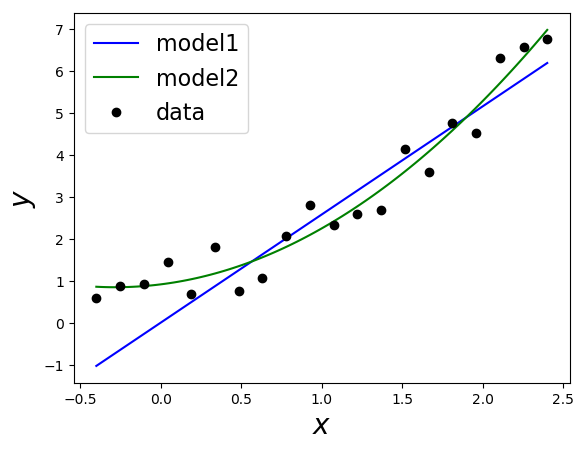

In [1]:
#####################################
## Simple function fitting demo

using PyPlot, PyCall
using Distributions

# true param
W = Array([1.0, 0.0, 1.0])

# generate data
sigma = 0.5
N = 20
X = linspace(-0.4,2.4,N)
Y = [W[1] + W[2]*x + W[3]*x^2 + sigma*randn() for x in X]
X_min = minimum(X)
X_max = maximum(X)

# regression1
X_all = linspace(X_min, X_max, 100)
W1 = sum(Y.*X) / sum(X.^2)
Y1 = [W1*x for x in X_all]

# regression2
X2 = zeros(3, N)
X2[1,:] = 1
X2[2,:] = X
X2[3,:] = X.^2
W2 = inv(X2*X2') * X2*Y
Y2 = [W2[1] + W2[2]*x + W2[3]*x^2 for x in X_all]

# show data
figure()
plot(X_all, Y1, "b-")
plot(X_all, Y2, "g-")
plot(X, Y, "ko")
legend(["model1","model2","data"], loc="upper left", fontsize=16)
xlabel("\$x\$", fontsize=20)
ylabel("\$y\$", fontsize=20)
show()